In [ ]:
!pip install skimpy

In [ ]:
import pandas as pd
import numpy as np
import joblib
from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_csv("wine.csv")

In [ ]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 178    │ │ float64     │ 11    │                                                          │
│ │ Number of columns │ 14     │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA  ┃ NA %   ┃ mean  ┃ sd    ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Alcohol                   │   0 │      0 │    13 │  0.81 │    11 │    12 │    13 │    14 │    15 │ ▂▆▇▇▇▂  │  │
│ │ Malic_acid                │   0 │      0 │   2.3 │   1.1 │  0.74 │   1.6 │   1.9 │   3.1 │   5.8 │ ▅▇▃▃▁▁  │  │
│ │ Ash                       │   0 │      0 │   2.4 │  0.27 │   1.4 │   2.2 │   2.4 │   2.6 │   3.2 │   ▂▆▇▃  │  │
│ │ Alcalinity                │   0 │      0 │    19 │   3.3 │    11 │    17 │    20 │    22 │    30 │  ▁▅▇▅▂  │  │
│ │ Magnesium                 │   0 │      0 │   100 │    14 │    70 │    88 │    98 │   110 │   160 │  ▂▇▅▂   │  │
│ │ Phenols                   │   0 │      0 │   2.3 │  0.63 │  0.98 │   1.7 │   2.4 │   2.8 │   3.9 │ ▃▇▆▇▅▁  │  │
│ │ Flavanoids                │   0 │      0 │     2 │     1 │  0.34 │   1.2 │   2.1 │   2.9 │   5.1 │  ▇▆▇▇▁  │  │
│ │ Nonflavanoids             │   0 │      0 │  0.36 │  0.12 │  0.13 │  0.27 │  0.34 │  0.44 │  0.66 │ ▃▇▅▅▃▂  │  │
│ │ Proanthocyanins           │   0 │      0 │   1.6 │  0.57 │  0.41 │   1.2 │   1.6 │   1.9 │   3.6 │  ▃▇▇▃▁  │  │
│ │ Color_intensity           │   0 │      0 │   5.1 │   2.3 │   1.3 │   3.2 │   4.7 │   6.2 │    13 │  ▆▇▆▃▂  │  │
│ │ Hue                       │   0 │      0 │  0.96 │  0.23 │  0.48 │  0.78 │  0.96 │   1.1 │   1.7 │  ▃▅▇▅▁  │  │
│ │ OD280_315_of_diluted_wine │   0 │      0 │   2.6 │  0.71 │   1.3 │   1.9 │   2.8 │   3.2 │     4 │ ▅▅▃▇▇▂  │  │
│ │ s                         │     │        │       │       │       │       │       │       │       │         │  │
│ │ Proline                   │   0 │      0 │   750 │   310 │   280 │   500 │   670 │   980 │  1700 │ ▇▇▃▃▂▁  │  │
│ │ WineVariety               │   0 │      0 │  0.94 │  0.78 │     0 │     0 │     1 │     2 │     2 │ ▇  ▇ ▅  │  │
│ └───────────────────────────┴─────┴────────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
#seperate all the features and labels
features = ['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_315_of_diluted_wines', 'Proline']
label = 'WineVariety'
x,y = df[features].values, df[label].values

print(df[label].head())
print(df[features].head(3))

0    0
1    0
2    0
3    0
4    0
Name: WineVariety, dtype: int64
   Alcohol  Malic_acid   Ash  ...   Hue  OD280_315_of_diluted_wines  Proline
0    14.23        1.71  2.43  ...  1.04                        3.92     1065
1    13.20        1.78  2.14  ...  1.05                        3.40     1050
2    13.16        2.36  2.67  ...  1.03                        3.17     1185

[3 rows x 13 columns]


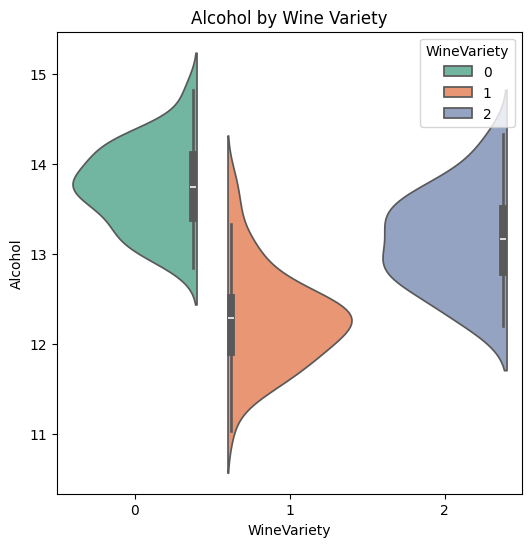

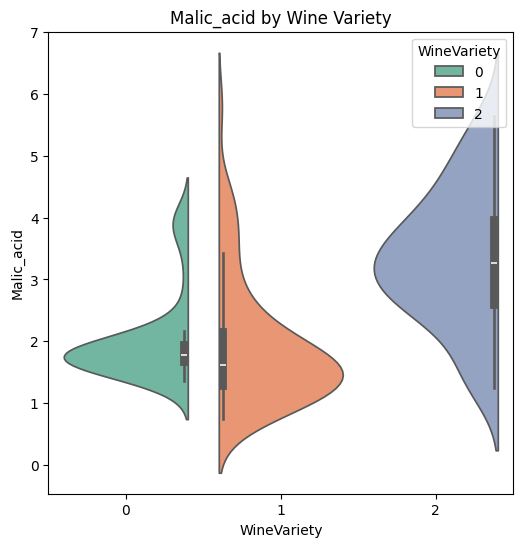

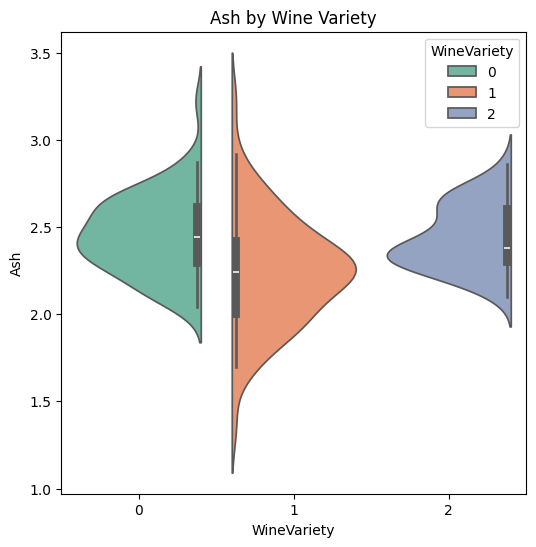

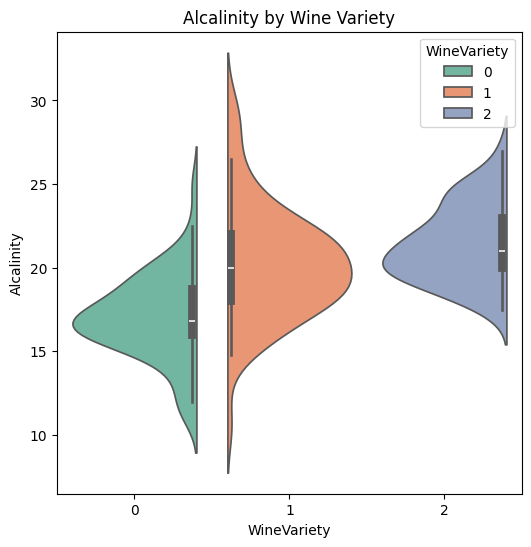

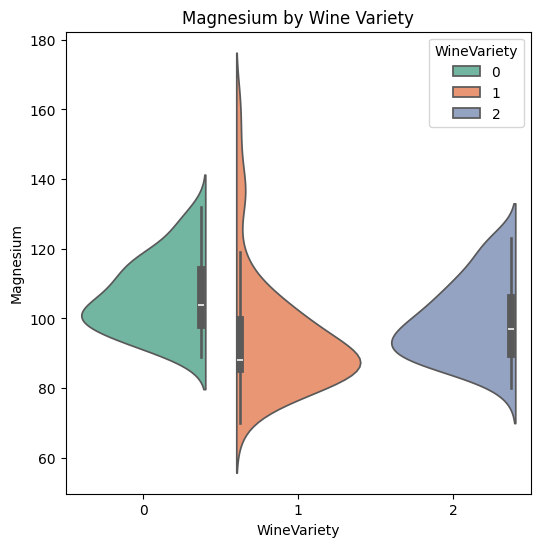

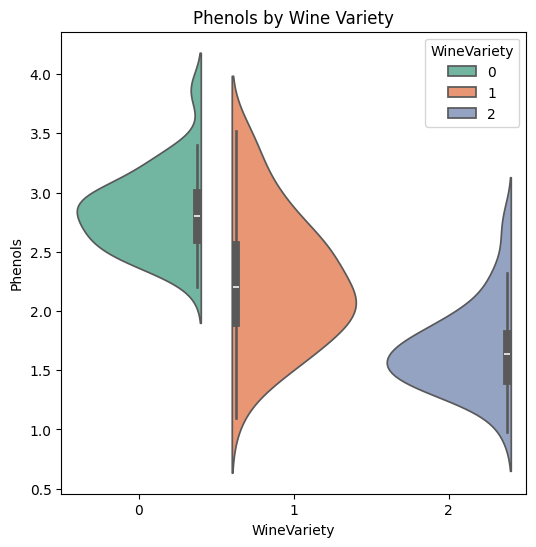

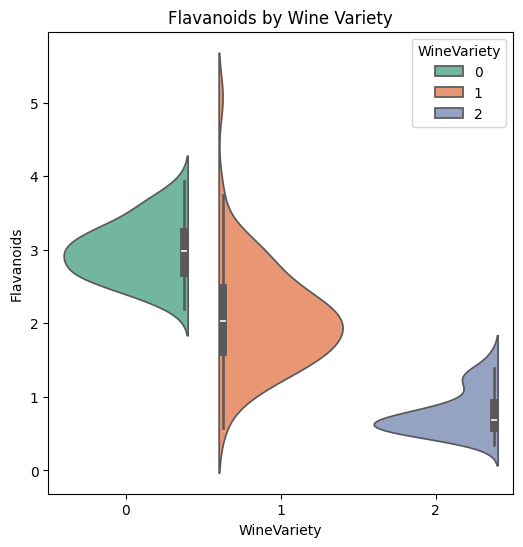

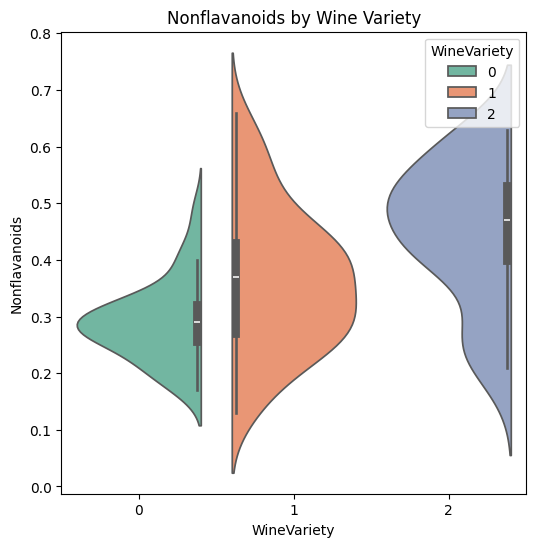

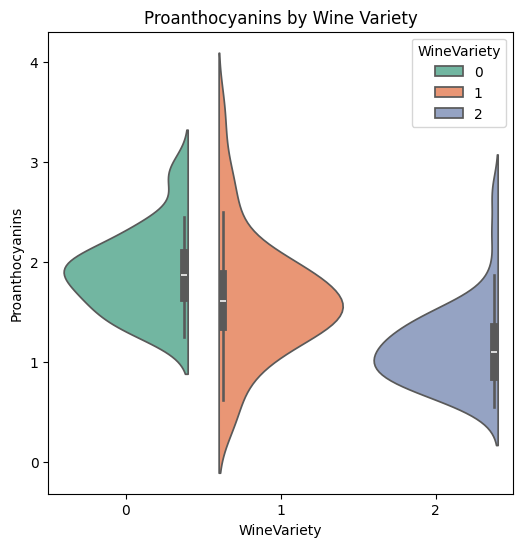

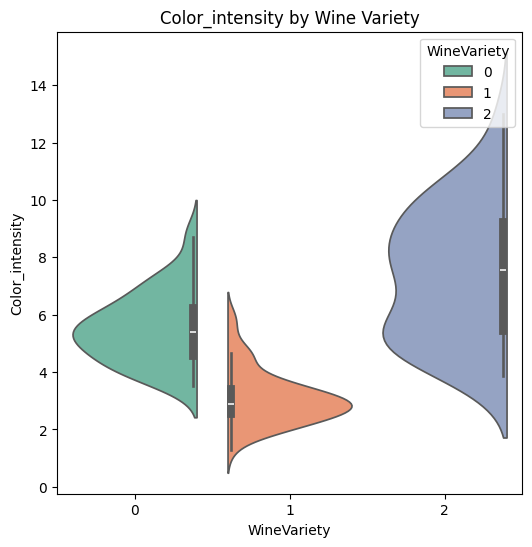

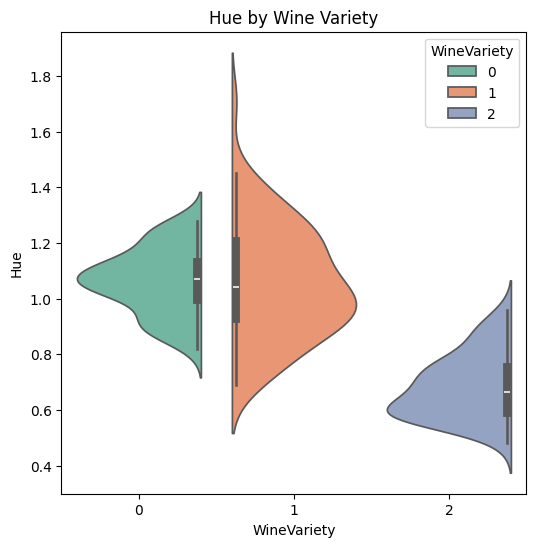

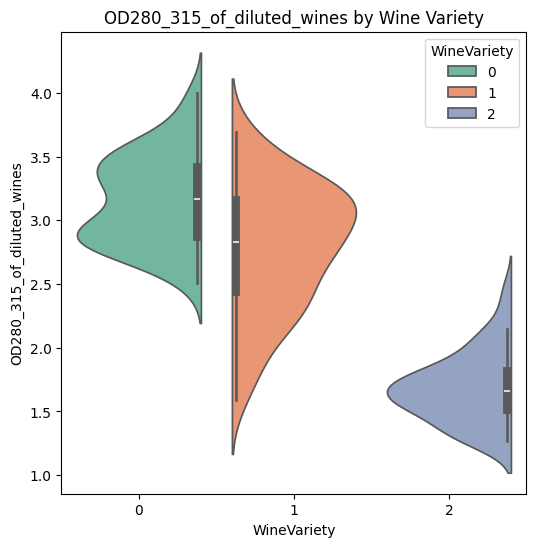

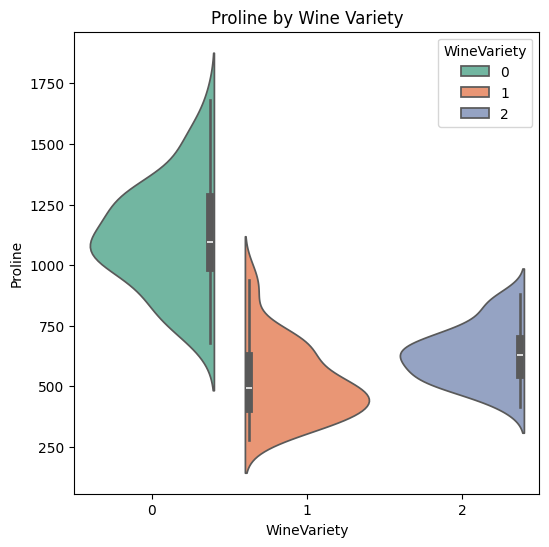

In [ ]:
for col in features:
    plt.figure(figsize=(6, 6))
    sns.violinplot(x=label, y=col, hue=label, data=df, palette='Set2', split=True)
    plt.title(f'{col} by Wine Variety')
    plt.legend(loc='upper right', title=label)
    plt.show()


In [ ]:
#split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=0)


In [ ]:
print('checking the number of Training cases:', X_train.shape[0])
print('checking the number of Training cases:', X_test.shape[0])

checking the number of Training cases: 142
checking the number of Training cases: 36


In [ ]:
model = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Preprocessing step: StandardScaler
    ('classifier', LogisticRegression(solver='lbfgs', multi_class='auto'))  # Logistic Regression classifier
])

# Fit the pipeline to the training data
model.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0
Overall F1 Score: 1.0


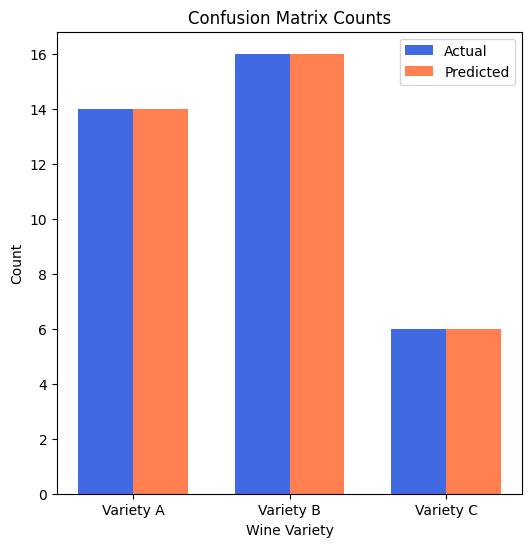

In [ ]:


# Get predictions from the test data
predicted_value = model.predict(X_test)

# Calculate and print metrics
accuracy = accuracy_score(Y_test, predicted_value)
precision, recall, f1, _ = precision_recall_fscore_support(Y_test, predicted_value, average='macro')

print("Overall Accuracy:", accuracy)
print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1 Score:", f1)

# Plot confusion matrix
cm = confusion_matrix(Y_test, predicted_value)
classes = ['Variety A', 'Variety B', 'Variety C']

actual_counts = cm.sum(axis=0)
predicted_counts = cm.sum(axis=1)

width = 0.35
fig, ax = plt.subplots(figsize=(6, 6))
bar1 = ax.bar(np.arange(len(classes)), actual_counts, width, label='Actual', color='royalblue')
bar2 = ax.bar(np.arange(len(classes)) + width, predicted_counts, width, label='Predicted', color='coral')

ax.set_title('Confusion Matrix Counts')
ax.set_xlabel('Wine Variety')
ax.set_ylabel('Count')
ax.set_xticks(np.arange(len(classes)) + width / 2)
ax.set_xticklabels(classes)
ax.legend()

plt.show()

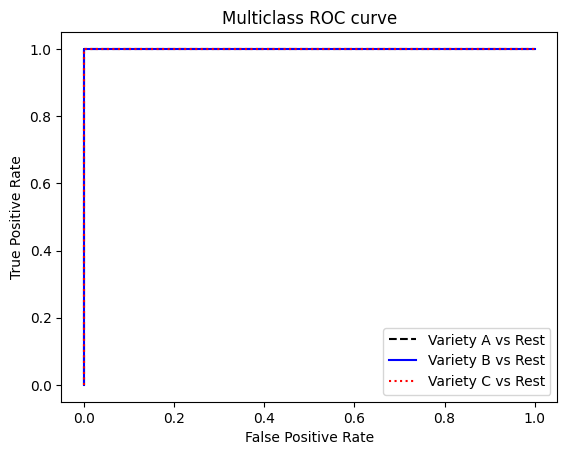

In [ ]:
# Getting the class probability scores
probabilities = model.predict_proba(X_test)

# Get ROC metrics for each class
false_positive_rate = {}
true_positive_r = {}
roc_auc = {}

for i in range(len(classes)):
    false_positive_rate[i], true_positive_r[i], _ = roc_curve(Y_test, probabilities[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(Y_test == i, probabilities[:, i])

# Plot the ROC chart
plt.plot(false_positive_rate[0], true_positive_r[0], linestyle='--', color='black', label=classes[0] + ' vs Rest')
plt.plot(false_positive_rate[1], true_positive_r[1], linestyle='-', color='blue', label=classes[1] + ' vs Rest')
plt.plot(false_positive_rate[2], true_positive_r[2], linestyle=':', color='red', label=classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()



In [ ]:

# using joblib we can save the model to disk
filename = 'final_model.sav'
joblib.dump(model, filename)

# load the model from disk
loaded_model = joblib.load(filename)
#store the new values
new_values = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

prediction_value = loaded_model.predict(new_values)
# Print the predicted classes
for prediction in prediction_value:
    print(prediction, '(' + classes[prediction] + ')')

test_set_accuracy = loaded_model.score(X_test, Y_test)
print("Test Accuracy:", test_set_accuracy)

0 (Variety A)
1 (Variety B)
Test Accuracy: 1.0


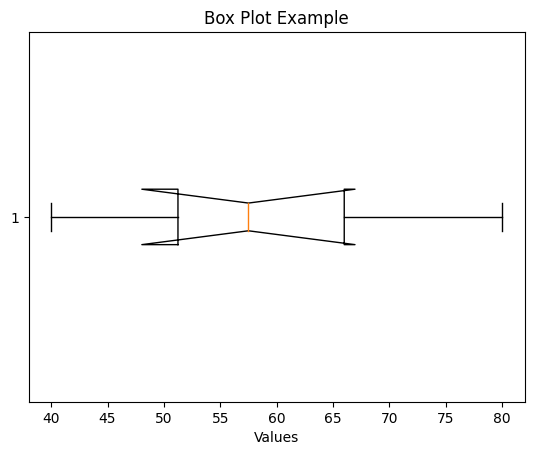

In [ ]:
import matplotlib.pyplot as plt

# Data for the box plot
data = [40, 50, 55, 60, 68, 80]

# Create a box plot
plt.boxplot(data, vert=False, notch=True, sym='+')

# Set labels and title
plt.xlabel('Values')
plt.title('Box Plot Example')

# Show the plot
plt.show()
